#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2: Sistemas lineales e invariantes en el tiempo
#### Luana Da Conceicao Ferreira


# Introducción
 
En esta segunda entrega seguimos trabajando con sistemas lineales e invariantes en el tiempo (LTI). A diferencia de la TS1, donde nos enfocamos más en generar y analizar distintas señales, acá el objetivo es ver cómo esas señales se transforman al pasar por un sistema.  

La forma más común de representar un sistema discreto es con una **ecuación en diferencias**, que relaciona la salida con la entrada y con salidas anteriores. De manera general se puede escribir como:  

$$
y[n] = \sum_{k=0}^{N} b_k \, x[n-k] + \sum_{k=1}^{M} a_k \, y[n-k]
$$

donde \(x[n]\) es la entrada, \(y[n]\) la salida y los coeficientes \(a_k, b_k\) definen el sistema.  

Un concepto clave es la **respuesta al impulso**, que básicamente es la salida del sistema cuando la entrada es una delta \($\delta[n]$). Esa respuesta se suele llamar \(h[n]\). 

Por ejemplo, si aplicamos \(x[n] = $\delta[n]$) en la ecuación en diferencias, la salida que obtenemos es justamente \(h[n]\). 

Conociendo esa respuesta, se puede calcular la salida para cualquier señal usando la convolución:  

$$
y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
$$

En el informe vamos a comparar la salida obtenida directamente resolviendo la ecuación en diferencias con la salida reconstruida a partir de la convolución con la respuesta al impulso, para chequear que coincidan.  

Además, al igual que en la TS1, también se van a calcular parámetros como la frecuencia de muestreo, el tiempo total de simulación y la energía o potencia de las señales de salida, para tener una descripción más completa de lo que pasa.  


# Análisis y desarrollo  

1. Respuesta del sistema a distintas entradas: se comenzó graficando la señal de salida para cada una de las señales de entrada que ya se habían generado en la TS1, considerando que todas son causales.

   A partir de ahí:  

    - Se obtuvo la **respuesta al impulso** del sistema, utilizando la ecuación en diferencias correspondiente.  
    - Con esa respuesta, se repitió la generación de la salida para una de las señales de entrada anteriores, verificando que coincidiera con la obtenida directamente con la función `lfilter`.  
    - Se compararon ambas formas de cálculo (convolución y `lfilter`), comprobando que los resultados eran equivalentes.  
    - Finalmente, se determinó la **frecuencia de muestreo, el tiempo de simulación y la energía o potencia** de la salida, lo que permitió caracterizar de manera completa el comportamiento del sistema.  



Frecuencia de muestreo fs = 100000 Hz
Tiempo de simulación T = 0.02 s
La potencia de la salida original es: 4.531709614764033
La potencia de la salida amplificada y desfazada es: 5.9478078644261965
La potencia de la salida modulada es: 1.6741242750987795
La potencia de la salida recortada es: 3.4497701151929423
La potencia de la salida cuadrada es: 6.191934452631438
La energia de la salida del pulso rectangular es: 40260618.36666432


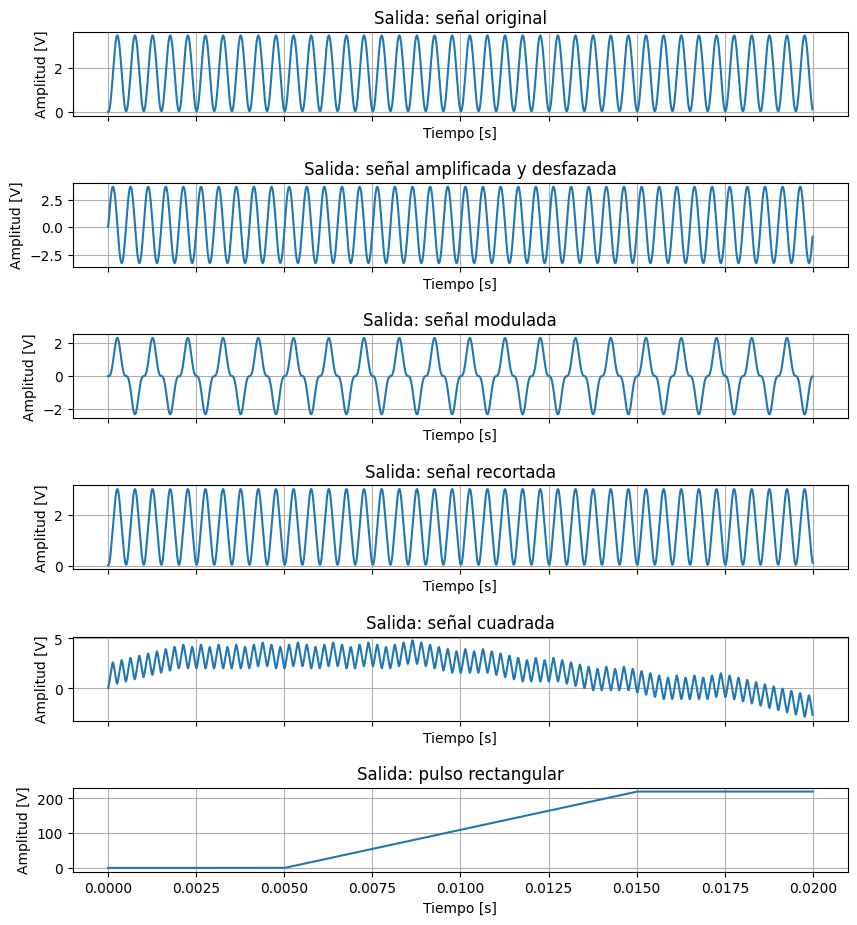

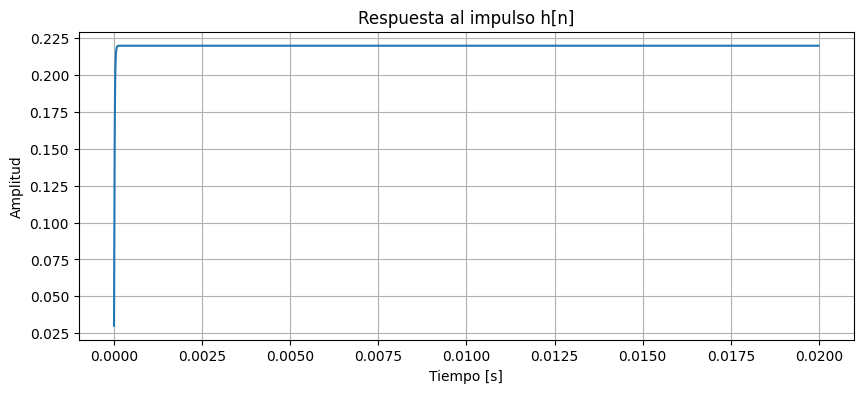

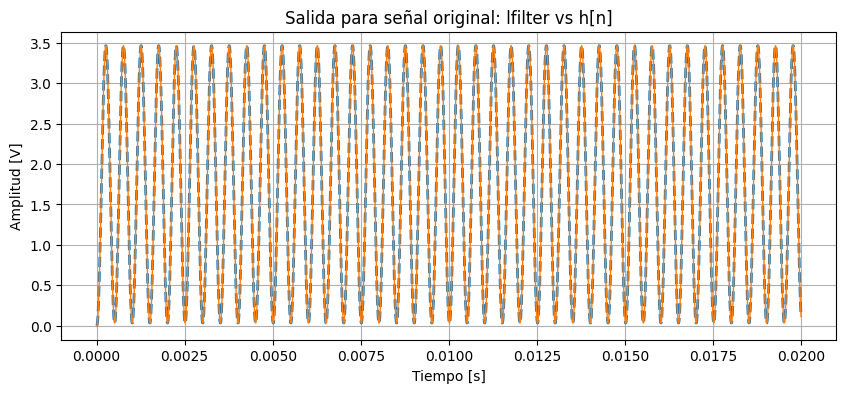

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.signal as sig

dc=0
nn=2000
fs=100000

def sen(amp, dc, ff, ph, nn, fs):
    n = np.arange(nn)
    t = n / fs
    x = dc + amp*np.sin(2*np.pi*ff*t + ph)
    return t, x

#ITEM 1
#Señales TS1
tt, xx  = sen(1, dc, 2000, 0,          nn, fs)      # original (sen 2 kHz)
tt, aa  = sen(2, dc, 2000, np.pi/2,    nn, fs)      # portadora (2 kHz, π/2)
tt, aux = sen(1, dc, 1000, 0,          nn, fs)      # mensaje (1 kHz)

mod = xx * aux                                         # producto original × mensaje
rec = np.clip(xx, -0.75, 0.75)                         # original recortada al 75%
cc = signal.square(2*np.pi*4000*tt)                    # cuadrada

t0 = 0.005 #inicio
t1 = 0.015 #fin         
p = ((tt >= t0) & (tt < t1)).astype(int)               # pulso de 10 ms

#EC. EN DIFERENCIAS: y[n] = 0.03 x[n] + 0.05 x[n-1] + 0.03 x[n-2] + 1.5 y[n-1] - 0.5 y[n-2]
a = np.array([1.0, -1.5, 0.5],   dtype=float)   #son los escalares que multiplican a las y
b = np.array([3e-2, 5e-2, 3e-2], dtype=float)   #son los escalares que multiplican a las x
delta = np.zeros(nn)
delta[0] = 1.0
h = signal.lfilter(b, a, delta)     #respuesta al impulso

y_xx  = signal.lfilter(b, a, xx)    #salida para la señal de entrada original
y_aa  = signal.lfilter(b, a, aa)    #salida para la señal de entrada amplificada y desfazada
y_mod = signal.lfilter(b, a, mod)   #salida para la señal de entrada modulada
y_rec = signal.lfilter(b, a, rec)   #salida para la señal de entrada recortada
y_cc  = signal.lfilter(b, a, cc)    #salida para la señal de entrada cuadrada
y_p   = signal.lfilter(b, a, p)     #salida para la señal de entrada pulso

y_xx_h = np.convolve(xx, h)[:nn]   #salida para la señal original usando respuesta al impulso

P_yxx  = np.mean(y_xx**2)       #potencia original
P_yaa  = np.mean(y_aa**2)       #potencia amplificada y desfazada
P_ymod = np.mean(y_mod**2)      #potencia modulada
P_yrec = np.mean(y_rec**2)      #potencia recortada
P_ycc  = np.mean(y_cc**2)       #potencia cuadrada
E_yp = np.sum(y_p**2)           #energia pulso
P_yxx_h = np.mean(y_xx_h**2)    #potencia original usando rta impulso    


print("Frecuencia de muestreo fs =", fs, "Hz")
print("Tiempo de simulación T =", nn/fs, "s")
print("La potencia de la salida original es:", P_yxx)
print("La potencia de la salida amplificada y desfazada es:", P_yaa)
print("La potencia de la salida modulada es:", P_ymod)
print("La potencia de la salida recortada es:", P_yrec)
print("La potencia de la salida cuadrada es:", P_ycc)
print("La energia de la salida del pulso rectangular es:", E_yp)


fig, axs = plt.subplots(6, 1, figsize=(10, 10), sharex=True)
axs = axs.ravel()
axs[0].plot(tt, y_xx);  axs[0].set_title("Salida: señal original")
axs[1].plot(tt, y_aa);  axs[1].set_title("Salida: señal amplificada y desfazada")
axs[2].plot(tt, y_mod); axs[2].set_title("Salida: señal modulada")
axs[3].plot(tt, y_rec); axs[3].set_title("Salida: señal recortada")
axs[4].plot(tt, y_cc);  axs[4].set_title("Salida: señal cuadrada")
axs[5].plot(tt, y_p);   axs[5].set_title("Salida: pulso rectangular")
plt.subplots_adjust(top=0.95, hspace=0.8, wspace=0.8)  #ajusta margenes

for ax in axs:
    ax.set_ylabel("Amplitud [V]")
    ax.set_xlabel("Tiempo [s]")
    ax.grid(True)

plt.figure(figsize=(10,4))
plt.plot(tt, h)
plt.title("Respuesta al impulso h[n]")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

#este grafico me permite comparar mejor porque las señales se superponen
plt.figure(figsize=(10,4))
plt.plot(tt, y_xx,    label="y[n] con lfilter",        linestyle="--", linewidth=2)
plt.plot(tt, y_xx_h,  label="y[n] con h[n] (convolución)", linewidth=1)
plt.title("Salida para señal original: lfilter vs h[n]")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)


2. Respuesta de los sistemas definidos por ecuaciones en diferencias: en este punto se trabajó con dos sistemas distintos, definidos por las siguientes ecuaciones en diferencias:  

    $$ y[n] = x[n] + 3 \cdot x[n-10] $$  

    $$ y[n] = x[n] + 3 \cdot y[n-10] $$
   
    A partir de ellas se realizaron los siguientes pasos:  

    - Se calculó la **respuesta al impulso** de cada sistema, aplicando un delta como señal de entrada.  
    - Con esas respuestas, se obtuvo la **salida correspondiente a una señal senoidal de entrada**, verificando el resultado también mediante la función `lfilter`.  


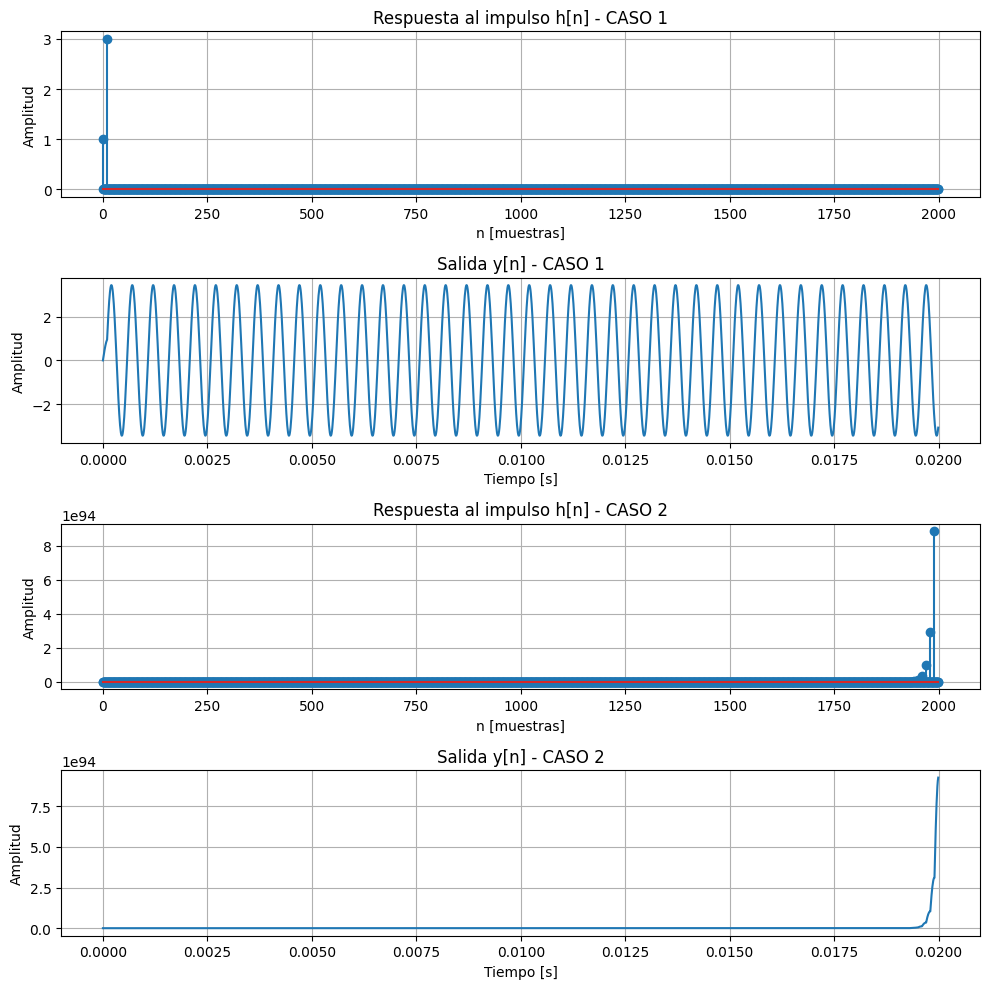

In [5]:
#ITEM 2
#primer caso: y[n] = x[n] + 3*x[n-10]
b1 = np.zeros(11, dtype=float) #necesito 11 porque son 10 retardos + coeficiente inicial
b1[0] = 1
b1[10] = 3
a1 = [1]

h1 = sig.lfilter(b1, a1, delta)       #respuesta al impulso
y1 = sig.lfilter(b1, a1, xx)          #salida

#segundo caso: y[n] = x[n] + 3*y[n-10]
b2 = [1]
a2 = np.zeros(11, dtype=float) #necesito 11 porque son 10 retardos + coeficiente inicial
a2[0] = 1
a2[10] = -3

h2 = sig.lfilter(b2, a2, delta)       #respuesta al impulso 
y2 = sig.lfilter(b2, a2, xx)          #salida

#fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
#axs[0].plot(tt, xx);   axs[0].set_title('Entrada x[n] (2 kHz)'); axs[0].grid(True)
#axs[1].stem(h1)
#axs[2].stem(h2)
#axs[3].plot(tt, y1, label='Salida sist.1'); 
#axs[3].plot(tt, y2, label='Salida sist.2', alpha=0.7); 
#axs[3].set_title('Salidas'); axs[3].legend(); axs[3].grid(True)

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
axs[0].stem(np.arange(len(h1)), h1)
axs[0].set_title('Respuesta al impulso h[n] - CASO 1')
axs[0].set_xlabel('n [muestras]'); axs[0].set_ylabel('Amplitud'); axs[0].grid(True)
axs[1].plot(tt, y1)
axs[1].set_title('Salida y[n] - CASO 1')
axs[1].set_xlabel('Tiempo [s]'); axs[1].set_ylabel('Amplitud'); axs[1].grid(True)
axs[2].stem(np.arange(len(h2)), h2)
axs[2].set_title('Respuesta al impulso h[n] - CASO 2')
axs[2].set_xlabel('n [muestras]'); axs[2].set_ylabel('Amplitud'); axs[2].grid(True)
axs[3].plot(tt, y2)
axs[3].set_title('Salida y[n] - CASO 2')
axs[3].set_xlabel('Tiempo [s]'); axs[3].set_ylabel('Amplitud'); axs[3].grid(True)
plt.subplots_adjust(top=0.95, hspace=0.8, wspace=0.8)  #ajusta margenes

plt.tight_layout()
plt.show()


# Conclusiones  

En este trabajo pudimos ver cómo un sistema definido por ecuaciones en diferencias responde de manera distinta según la señal de entrada. Primero calculamos la respuesta al impulso y comprobamos que aplicar la convolución con h[n] o usar directamente `lfilter` nos daba lo mismo, lo que sirvió para validar el procedimiento.  

Con las señales del TS1 notamos diferencias claras. En las senoidales (la original y la amplificada y desfazada) la salida mantuvo la frecuencia pero cambió la amplitud, mostrando que el sistema no altera la forma sino que la atenúa o amplifica. Cuando usamos la señal modulada, en cambio, apareció un comportamiento más complejo: la envolvente se vio reflejada en la salida, distinto a lo que pasaba con senoidales puras. Con la señal recortada y la cuadrada el efecto del sistema fue todavía más evidente, porque al tener bordes abruptos y armónicos de alta frecuencia, el sistema los suavizó y filtró. Esto deja en claro que cuanto más “brusca” es la señal, más se nota el filtrado. En el caso del pulso rectangular, el gráfico mostró una salida que aparece solo en el intervalo donde dura el pulso, y después desaparece. A diferencia de las otras, no es periódica sino limitada en el tiempo, por eso lo que tiene sentido calcular es la energía total y no la potencia promedio. Comparando todos los resultados, se ve cómo el mismo sistema puede actuar casi imperceptiblemente sobre unas señales y mucho más fuerte sobre otras.  

En la segunda parte del trabajo analizamos dos ecuaciones en diferencias con retardos. Aunque a primera vista se parecían, el comportamiento fue totalmente distinto. En el primer caso, donde la salida depende solo de la entrada con un retardo, lo que se obtiene es básicamente la señal original sumada con una copia corrida y amplificada, algo parecido a un eco, y se mantiene estable. En el segundo caso, como la salida depende de sí misma con realimentación positiva, la señal creció sin límite y se volvió inestable. Esta comparación mostró de manera muy clara la importancia que tienen los coeficientes y la forma de la ecuación: un pequeño cambio alcanza para pasar de un sistema estable a uno que diverge.  

En conclusión, el trabajo sirvió no solo para practicar cómo se aplica la teoría de sistemas lineales y la relación entre convolución, respuesta al impulso y ecuaciones en diferencias, sino también para comparar en la práctica cómo se comportan distintas señales y cómo cambia radicalmente la salida según la estabilidad del sistema.  


# Autoevaluación  

Tuve algunas complicaciones mientras hacía la tarea:

Una fue cuando quise comparar la convolución con `lfilter`, porque no entendía bien cómo superponer los gráficos, y luego veía el mismo gráfico porque una linea tapaba la otra. 

También me costó la parte de los retardos, no me cerraba por qué había que poner 11 y no 10.

Para resolver esas dudas usé ChatGPT, que me dio una mano con eso y también lo aproveché para consultar un poco de LaTeX y revisar si tenía errores de ortografía. Con esas ayudas pude terminar el trabajo más tranquilo y entendiendo mejor los puntos que me trababan.  
